<a href="https://colab.research.google.com/github/koolganni/kaggle-survey-2020-eda/blob/main/kaggle-survey-2020-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle 설치

In [1]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls -1ha kaggle.json

kaggle.json


In [5]:
!kaggle competitions download -c kaggle-survey-2020

  0% 0.00/46.5k [00:00<?, ?B/s]
100% 46.5k/46.5k [00:00<00:00, 18.0MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 36.0MB/s]
  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 63.1MB/s]


In [6]:
!kaggle --version

Kaggle API 1.5.4


https://www.kaggle.com/c/kaggle-survey-2020/rules
accept the rules for this competition 해야 다운로드에서 403 forbidden error 방지

#데이터셋 불러오기

In [7]:
!kaggle competitions download -c kaggle-survey-2020

kaggle_survey_2020_answer_choices.pdf: Skipping, found more recently modified local copy (use --force to force download)
kaggle_survey_2020_methodology.pdf: Skipping, found more recently modified local copy (use --force to force download)
kaggle_survey_2020_responses.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

kaggle.json			       kaggle_survey_2020_responses.csv.zip
kaggle_survey_2020_answer_choices.pdf  sample_data
kaggle_survey_2020_methodology.pdf


In [9]:
!unzip kaggle_survey_2020_responses.csv.zip

Archive:  kaggle_survey_2020_responses.csv.zip
  inflating: kaggle_survey_2020_responses.csv  


In [10]:
!ls

kaggle.json			       kaggle_survey_2020_responses.csv
kaggle_survey_2020_answer_choices.pdf  kaggle_survey_2020_responses.csv.zip
kaggle_survey_2020_methodology.pdf     sample_data


In [11]:
import pandas as pd

df = pd.read_csv('kaggle_survey_2020_responses.csv', low_memory=False)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


#EDA

In [13]:
question = df.iloc[0] # 첫 번째 행
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [14]:
answer = df.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Current

##캐글러의 연령대는 어떻게 될까?

In [15]:
# Q1 빈도수
answer['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [16]:
# 비율
answer['Q1'].value_counts(normalize=True) * 100

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
  plt.figure(figsize=fsize)
  if not order:
    order = answer[qno].value_counts().index # 빈도수가 많은 순
  sns.countplot(data=answer, y=qno,
                order=order, 
                palette='Blues_r').set_title(question[qno])

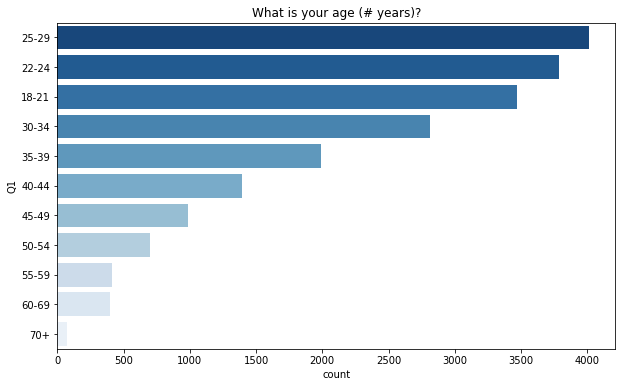

In [18]:
show_countplot_by_qno('Q1')

###연령대 별 성비는 어떨까?

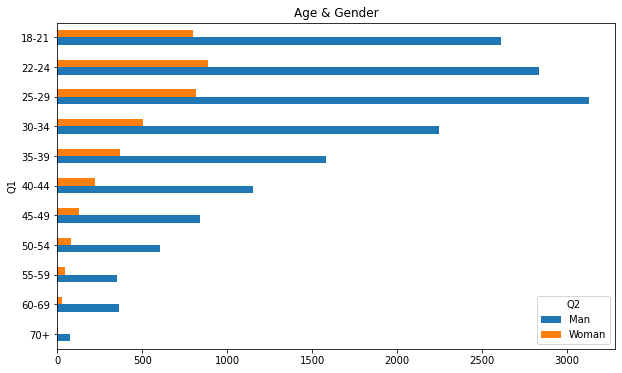

In [19]:
# Q1 : age, Q2 : gender
q1q2 = pd.crosstab(answer['Q1'], answer['Q2'])
q1q2[['Man', 'Woman']].sort_index(ascending=False).plot.barh(figsize=(10, 6), title="Age & Gender");

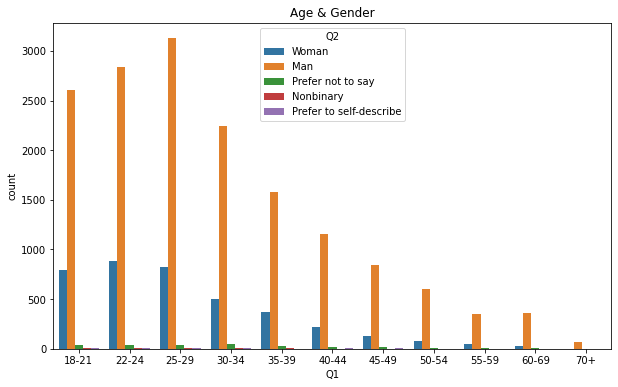

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer.sort_values('Q1'), x='Q1', hue='Q2').set_title("Age & Gender");

##캐글러는 어느 나라 사람일까?

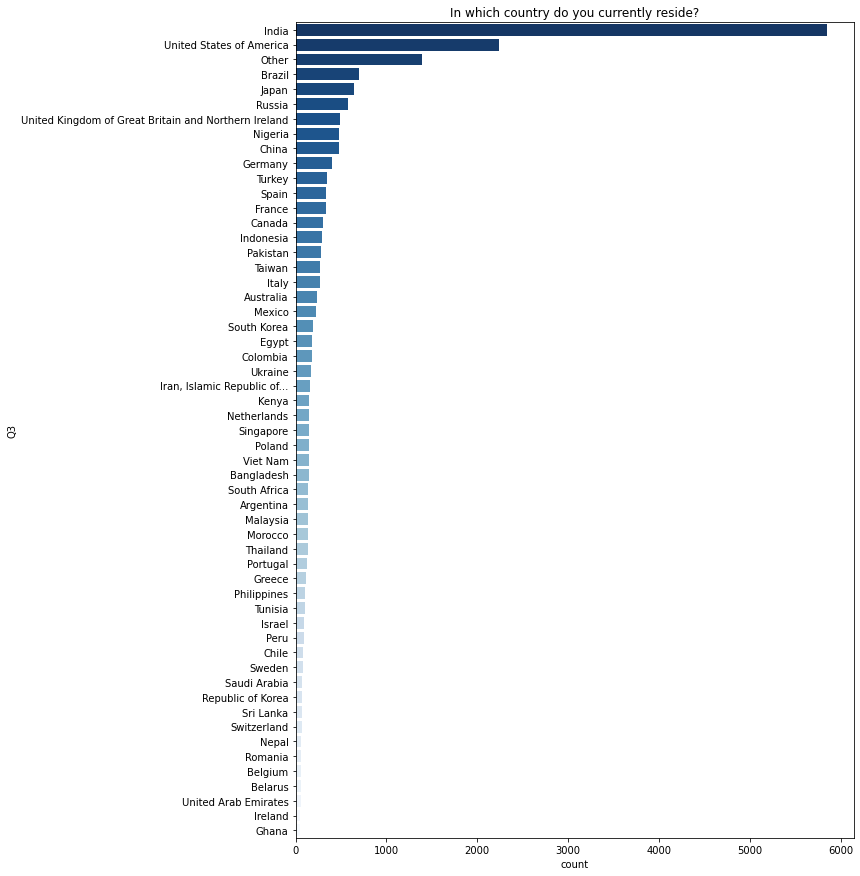

In [21]:
show_countplot_by_qno('Q3', (10, 15))

##캐글러 중에는 학사보다 석사가 더 많을까?

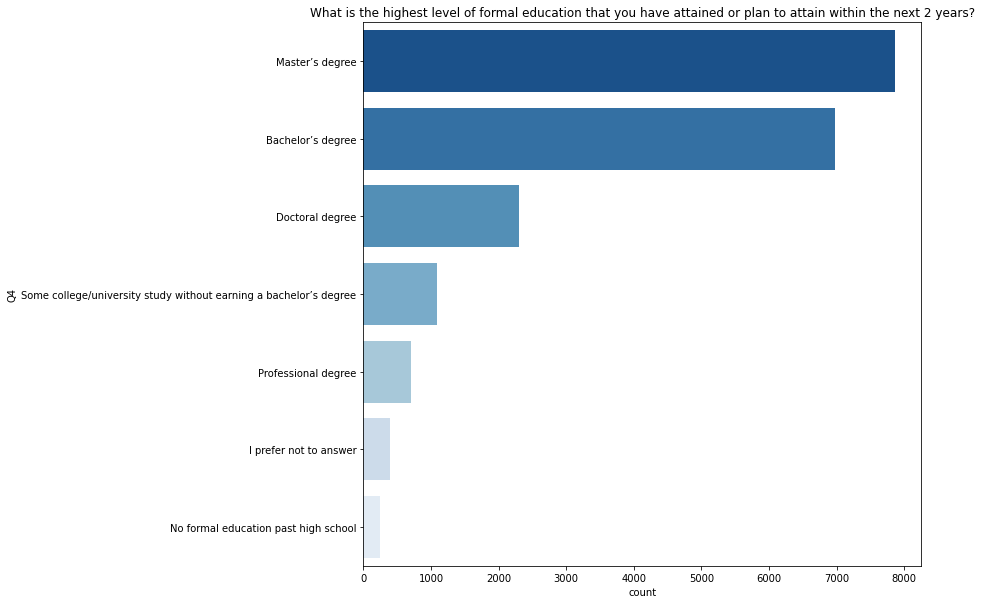

In [22]:
show_countplot_by_qno('Q4', (10, 10))

###한국에서는 어떨까?

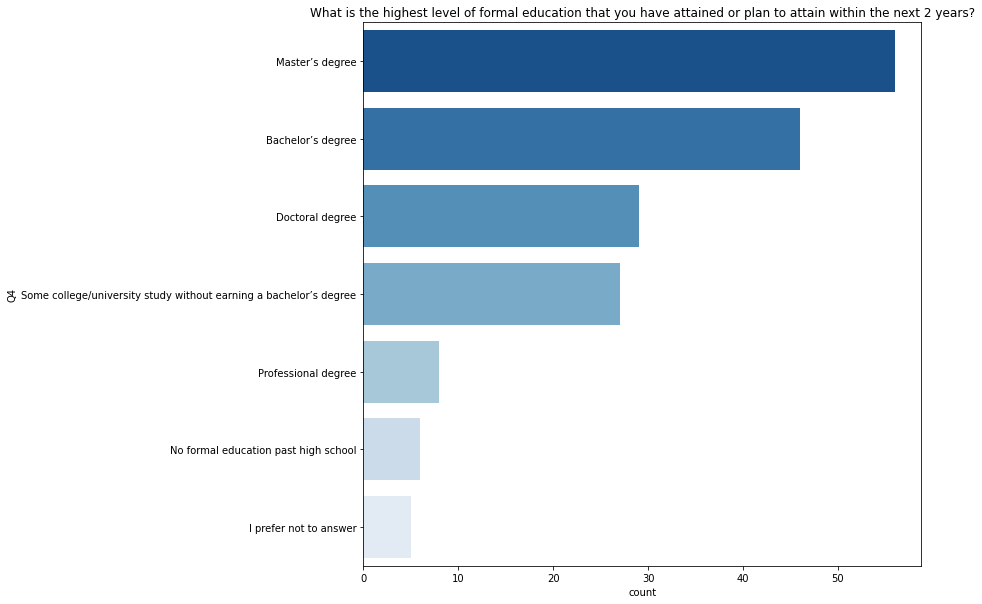

In [23]:
plt.figure(figsize=(10, 10))
qno = 'Q4'
kor = answer[(answer['Q3'] == 'South Korea')]
order = kor[qno].value_counts().index # 빈도수가 많은 순
sns.countplot(data=kor, y=qno,
              order=order, 
              palette='Blues_r').set_title(question[qno]);

In [24]:
kor[qno].value_counts(normalize=True) * 100

Master’s degree                                                      31.638418
Bachelor’s degree                                                    25.988701
Doctoral degree                                                      16.384181
Some college/university study without earning a bachelor’s degree    15.254237
Professional degree                                                   4.519774
No formal education past high school                                  3.389831
I prefer not to answer                                                2.824859
Name: Q4, dtype: float64

##캐글러의 직업은?

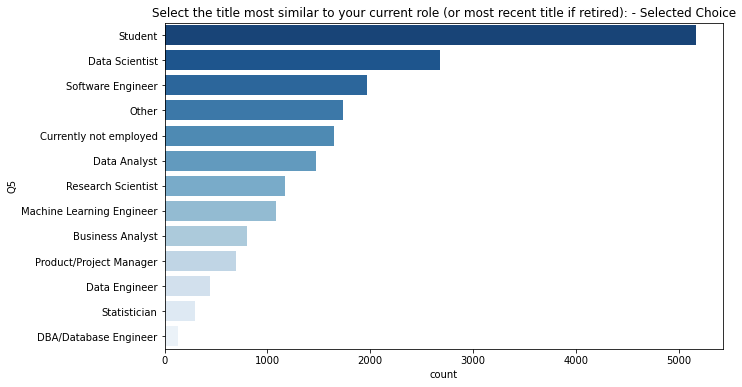

In [25]:
show_countplot_by_qno('Q5')

###한국에서는 어떨까?

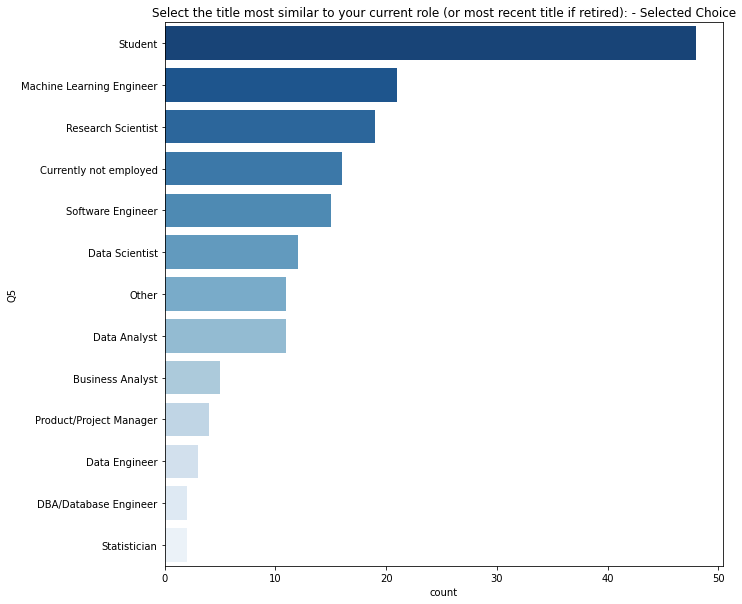

In [26]:
plt.figure(figsize=(10, 10))
qno = 'Q5'
kor = answer[(answer['Q3'] == 'South Korea')]
order = kor[qno].value_counts().index # 빈도수가 많은 순
sns.countplot(data=kor, y=qno,
              order=order, 
              palette='Blues_r').set_title(question[qno]);

In [27]:
kor[qno].value_counts()

Student                      48
Machine Learning Engineer    21
Research Scientist           19
Currently not employed       16
Software Engineer            15
Data Scientist               12
Other                        11
Data Analyst                 11
Business Analyst              5
Product/Project Manager       4
Data Engineer                 3
DBA/Database Engineer         2
Statistician                  2
Name: Q5, dtype: int64

##캐글러의 프로그래밍 경험은 어떻게 될까?

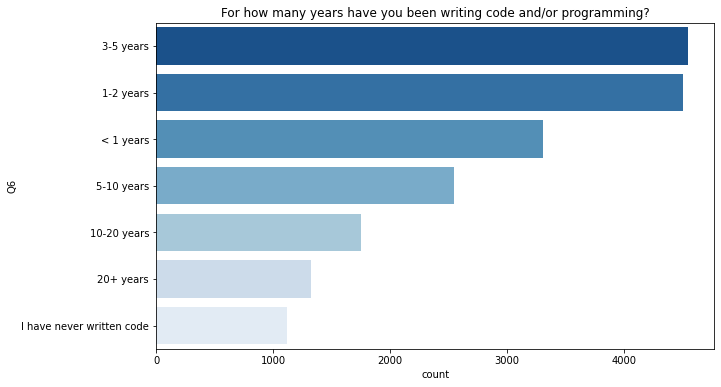

In [28]:
show_countplot_by_qno('Q6')

In [29]:
answer.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
answer_Q7 = answer.filter(regex='Q7')
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
question_Q7 = question.filter(regex='Q7')
question_Q7

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [32]:
question_Q7[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

###주로 어떤 프로그래밍 언어를 사용할까?

In [33]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945






> count 값과 freq 값이 같고, unique한 값이 1인 것으로 보아 아래와 같이 다시 정리할 수 있다.





In [34]:
answer_Q7_count = answer_Q7_desc.loc[['top', 'count']].T.set_index('top').sort_values('count', ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


In [35]:
Q7_title = question_Q7[0].split('-')[0]

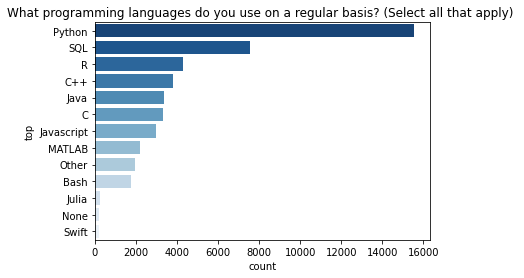

In [36]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x='count', palette='Blues_r').set_title(Q7_title);

###모든 성별이 사용하는 언어가 비슷할까?

In [47]:
# q2, q7 (multi choice) crosstab
# 정규표현식으로 필터링해서 해당 컬럼 가져오기
q2q7 = answer.filter(regex='Q7|Q2$') # 시작은 ^, 끝은 $
q2q7_count = q2q7.groupby('Q2').count()
q2q7_count

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


In [50]:
# Q7_Part_1, 2, 3 ... 뭘 의미하는 건지 알 수 없음
q7_cols = answer.filter(regex='Q7').describe().loc['top'].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [51]:
q2q7_count.columns = q7_cols
q2q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


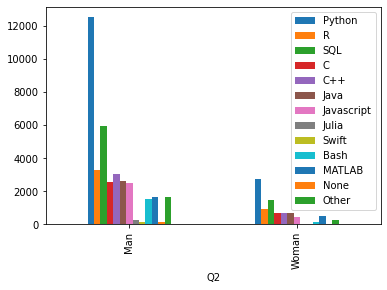

In [53]:
q2q7_count.loc[['Man', 'Woman']].plot.bar();

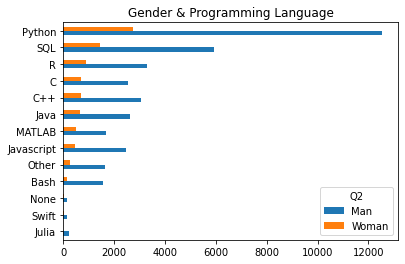

In [57]:
# 좀 더 언어별로 빈도수 차이가 드러나도록
q2q7_count.loc[['Man', 'Woman']].T.sort_values('Woman').plot.barh(title='Gender & Programming Language');

In [38]:
# Q7처럼 Multiple Choice 질문 응답을 시각화하기 위한 함수

def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split('-')[0]
    return q_no

def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[['top', 'count']].T.set_index('top').sort_values('count', ascending=False)
  return answer_count

def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
  question_title = get_question_title_by_qno(qno)
  plt.figure(figsize=(10, 6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index, x='count', palette='Blues_r').set_title(question_title);

In [58]:
# single choice 혹은 multiple choice 를 하나의 함수로 분석하고 싶다면
def show_plot_by_qno(qno):
  if qno in question.index: 
    # single
    show_countplot_by_qno(qno)
  else: 
    # multiple
    show_multiple_choice_bar_plot_by_qno(qno)

###캐글러는 데이터 사이언티스트가 되고자 하는 사람들에게 처음에 어떤 프로그래밍 언어를 배우는 것을 추천할까?

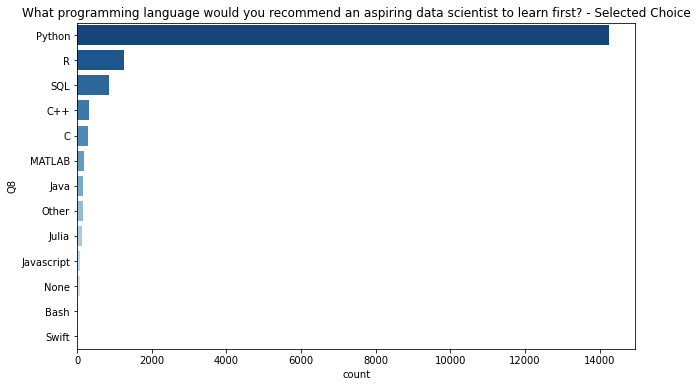

In [69]:
show_plot_by_qno('Q8')

###주로 어떤 IDE와 Notebook, 플랫폼, 하드웨어를 사용할까?

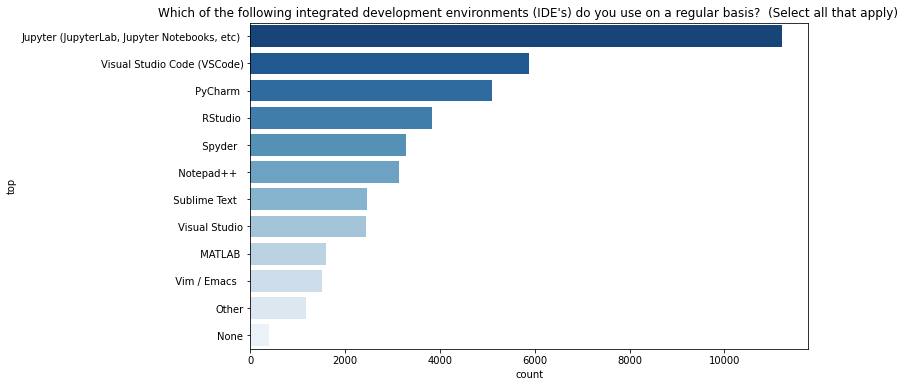

In [70]:
show_plot_by_qno('Q9')

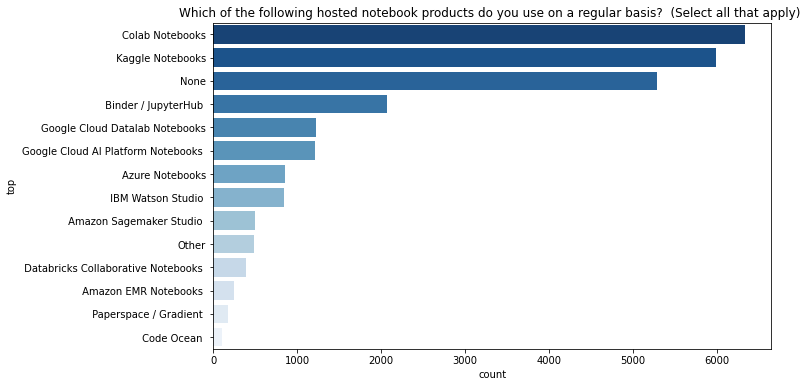

In [71]:
show_plot_by_qno('Q10')

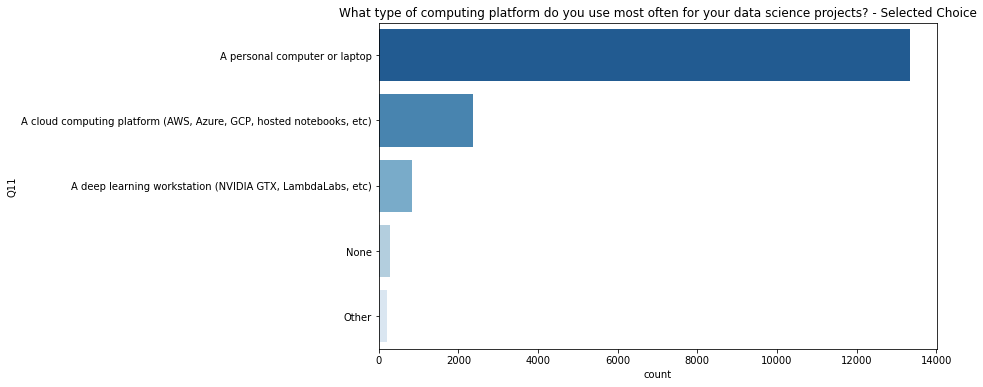

In [72]:
show_plot_by_qno('Q11')

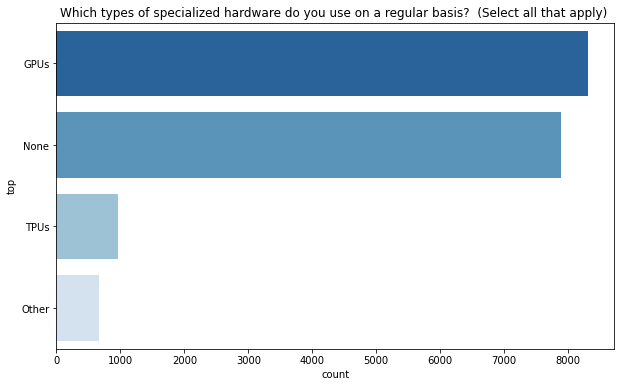

In [73]:
show_plot_by_qno('Q12')

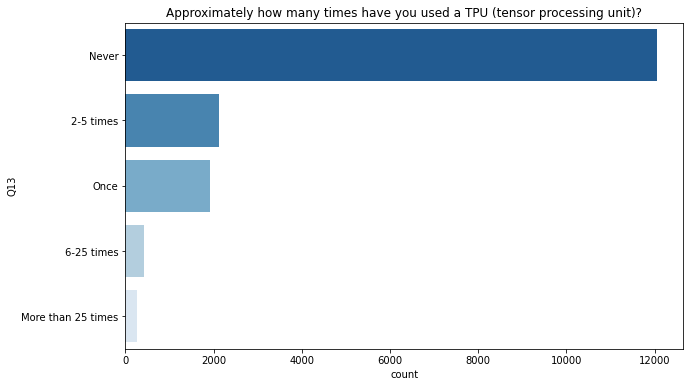

In [74]:
show_plot_by_qno('Q13')

##캐글러는 주로 어떤 시각화 도구를 사용할까?

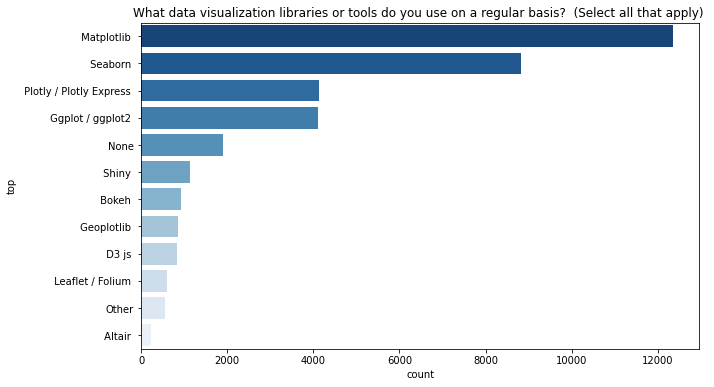

In [75]:
show_plot_by_qno('Q14')

##캐글러의 머신러닝 활용 경험은 어떻게 될까?

###머신러닝을 사용한지 몇년이 됐을까?

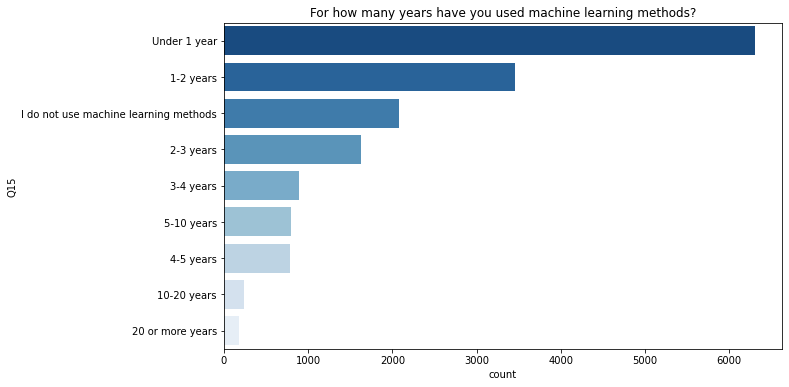

In [76]:
show_plot_by_qno('Q15')

###주로 어떤 머신러닝 프레임워크를 사용할까?

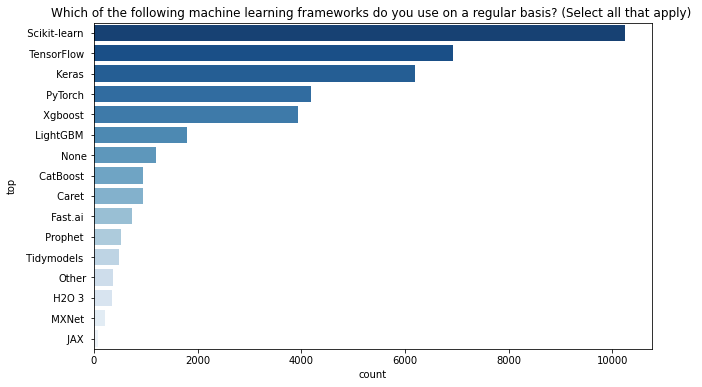

In [77]:
show_plot_by_qno('Q16')

###주로 어떤 머신러닝 알고리즘을 사용할까? 🤩

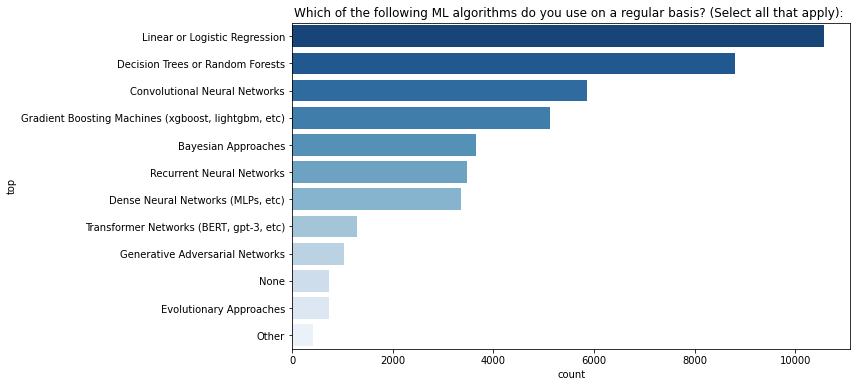

In [78]:
show_plot_by_qno('Q17')

###컴퓨터 비전 분야에서는?

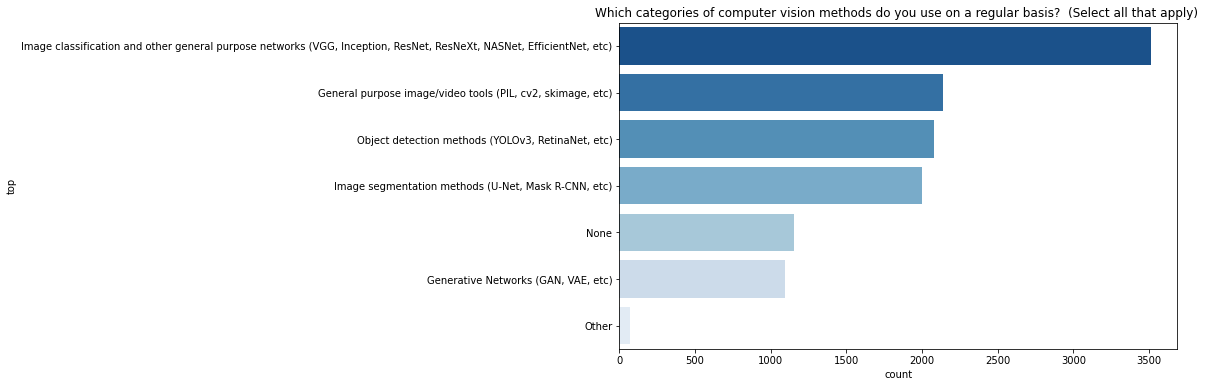

In [79]:
show_plot_by_qno('Q18')

###자연어 처리 분야에서는?

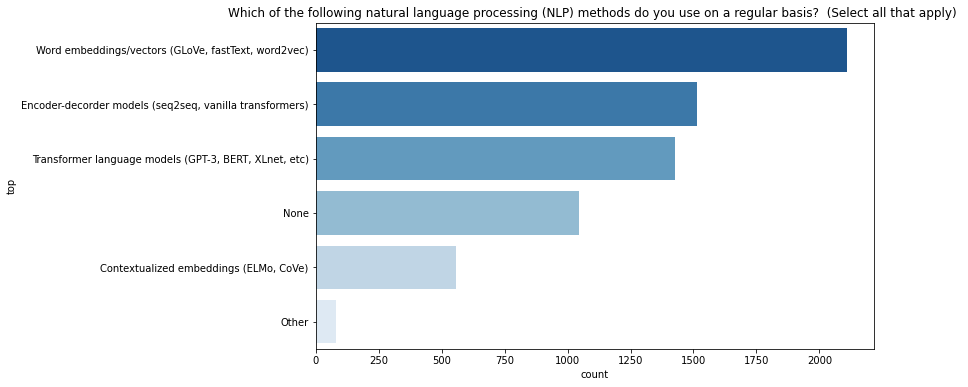

In [80]:
show_plot_by_qno('Q19')

##캐글러는 어떤 회사에 다니고 무슨 일을 할까?

###회사의 규모는?

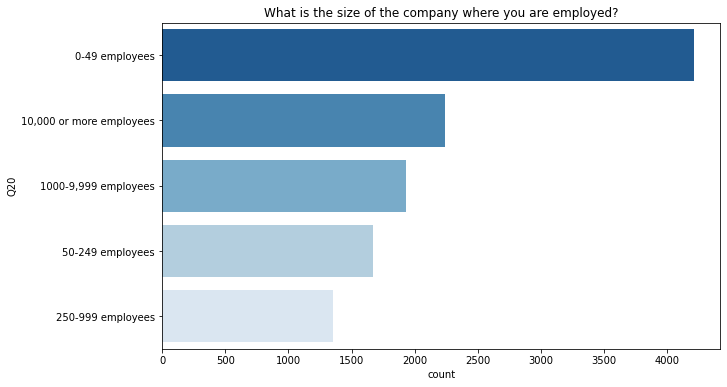

In [81]:
show_plot_by_qno('Q20')

###근무하는 곳에서 데이터 사이언스 업무를 하는 사람이 몇명 정도인지?

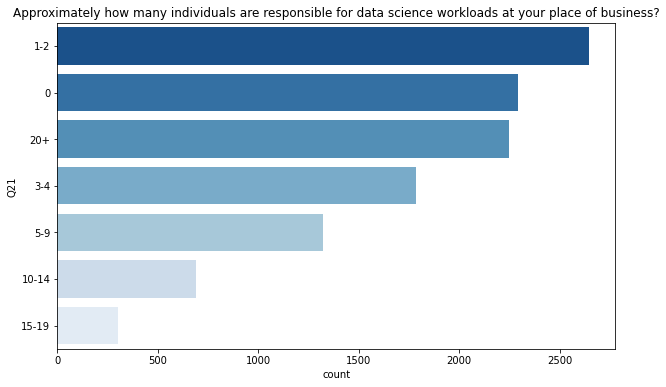

In [82]:
show_plot_by_qno('Q21')

###실제 업무에서 머신러닝을 어느 정도 사용하고 있는지? 🤔

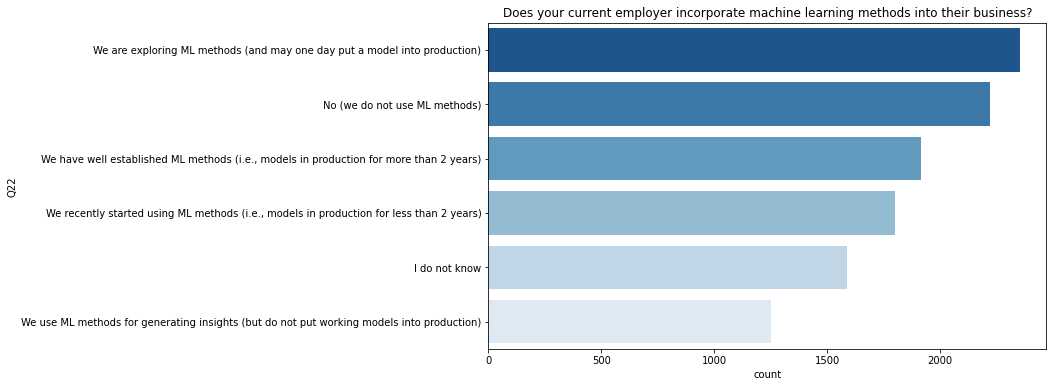

In [83]:
show_plot_by_qno('Q22')

###담당하고 있는 업무가 무엇인지?

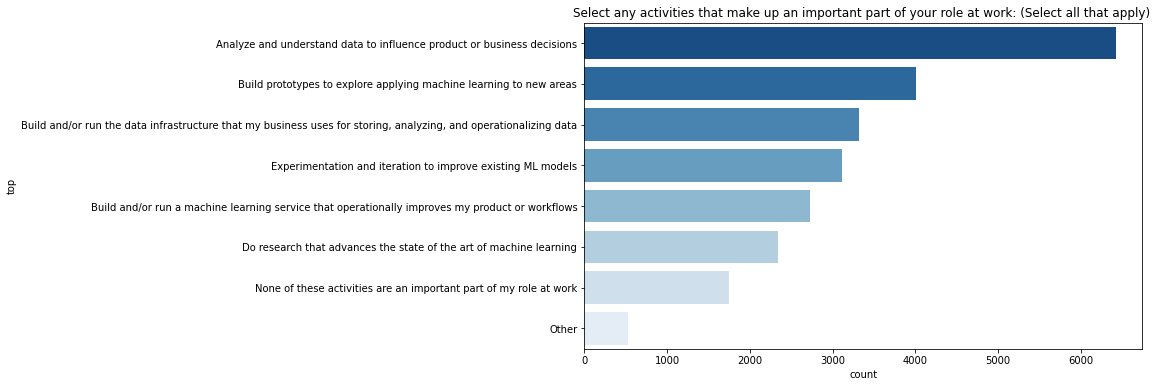

In [84]:
show_plot_by_qno('Q23')

정말 재밌어 보인다 👏🏻👏🏻

###연봉은 어느 정도 될까?

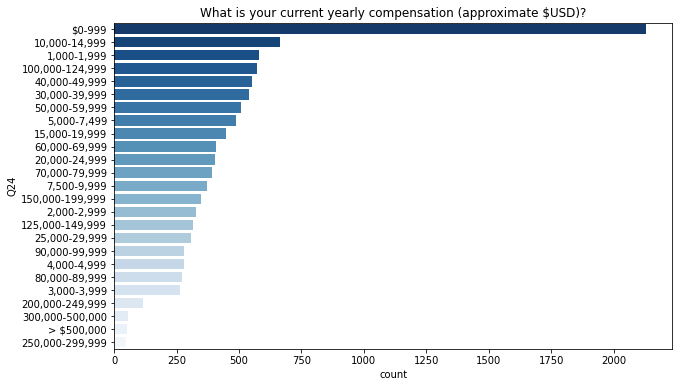

In [85]:
show_plot_by_qno('Q24')

그래프의 y축을 연봉 순으로 바꿔보자

In [91]:
q24_count = answer['Q24'].value_counts().reset_index()
q24_count.columns = ['range', 'count']
q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [93]:
q24_count['range'].str.split('-', expand=True)

,0,1
0,$0,999
1,"10,000","14,999"
2,"1,000","1,999"
3,"100,000","124,999"
4,"40,000","49,999"
5,"30,000","39,999"
6,"50,000","59,999"
7,"5,000","7,499"
8,"15,000","19,999"
9,"60,000","69,999"


In [96]:
q24_count['min'] = q24_count['range'].str.split('-', expand=True)[0]
q24_count['max'] = q24_count['range'].str.split('-', expand=True)[1]

# min, max 를 숫자로 바꾸는 과정
# 콤마와 달러 표시 지우기 (달러는 정규표현식에서 의미가 있으므로 \ 필수)
q24_count['min'] = q24_count['min'].str.replace(',|\$|>', '').astype(int)
q24_count = q24_count.sort_values('min') # 연봉 순으로 정렬
q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


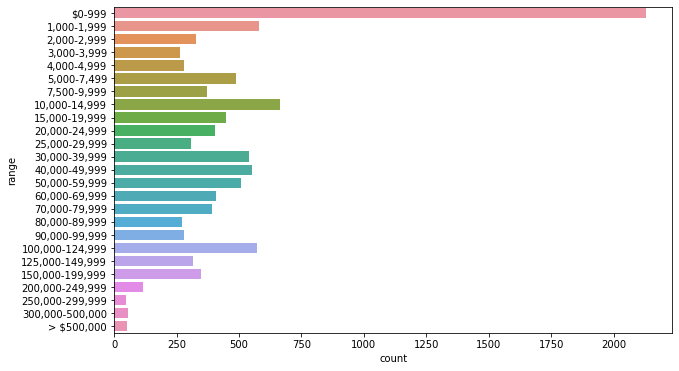

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=q24_count, x='count', y='range');

나라별로 연봉의 차이가 있을 것 같다.

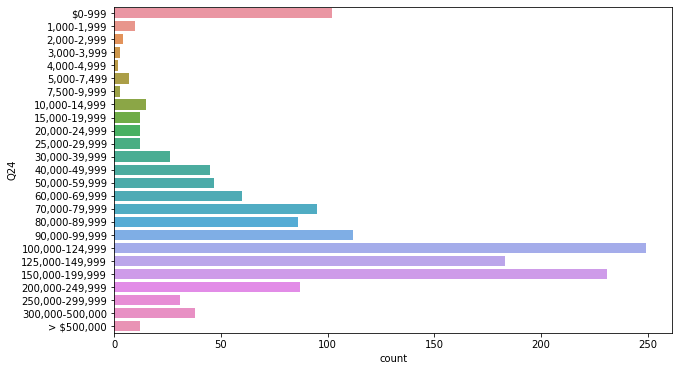

In [104]:
# 미국 데이터
q3_usa = answer[(answer['Q3'].isin(['United States of America']))]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24', order=q24_count.range.tolist());

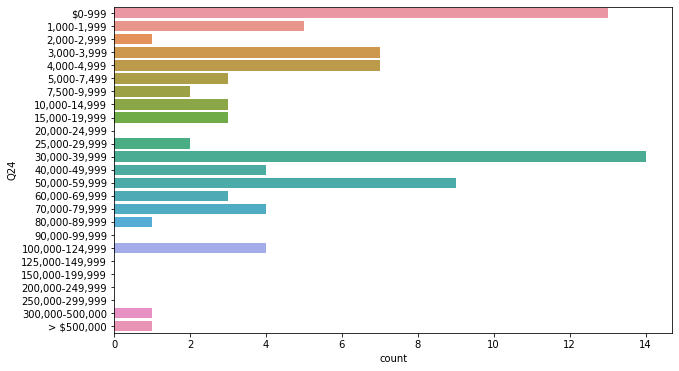

In [105]:
# 한국 데이터
q3_korea = answer[(answer['Q3'].isin(['South Korea']))]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_korea, y='Q24', order=q24_count.range.tolist());

##캐글러는 어떤 클라우드 컴퓨팅/머신러닝/빅데이터 도구와 플랫폼을 사용할까?

###주로 어떤 클라우드 컴퓨팅 플랫폼을 사용하고 있는지?

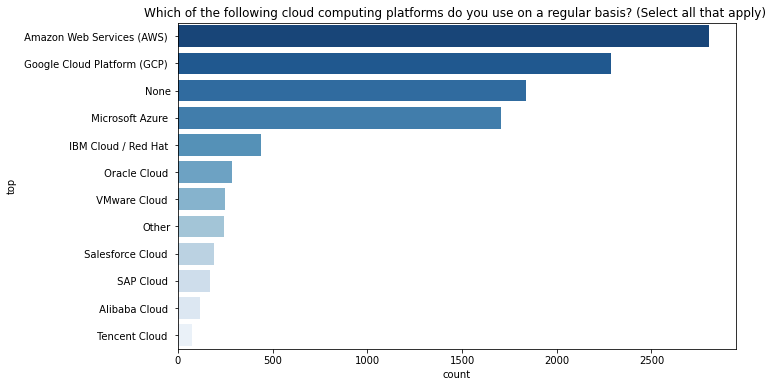

In [106]:
show_plot_by_qno('Q26_A')

###앞으로 2년 동안은 어떤 클라우드 컴퓨팅 플랫폼을 사용할 것인지? 

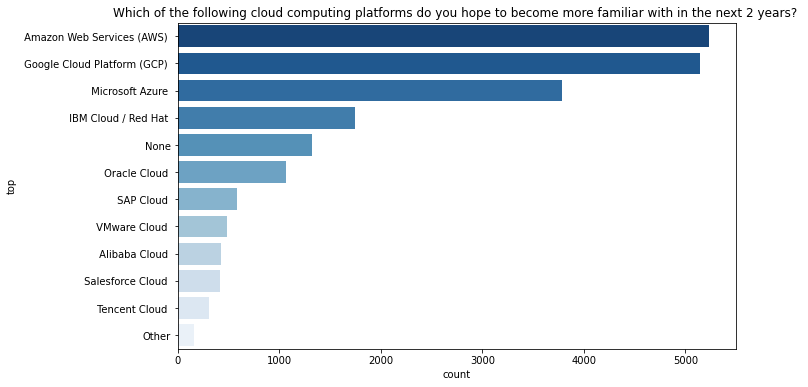

In [107]:
show_plot_by_qno('Q26_B')

###주로 어떤 클라우드 컴퓨팅 플랫폼 **제품**을 사용하고 있는지?

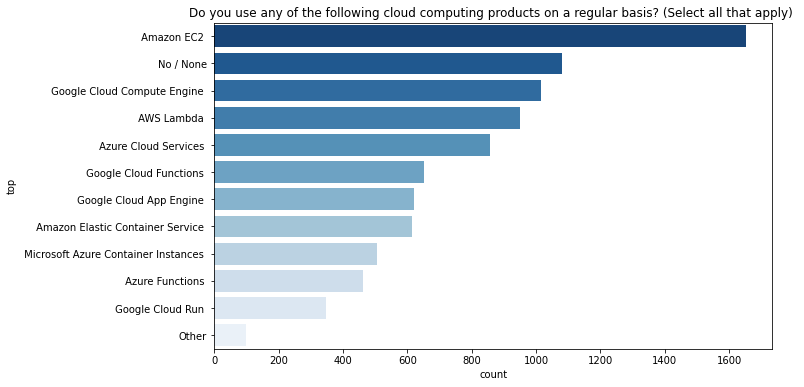

In [108]:
show_plot_by_qno('Q27_A')

###앞으로 2년 동안은 어떤 클라우드 컴퓨팅 플랫폼 **제품**을 사용할 것인지? 

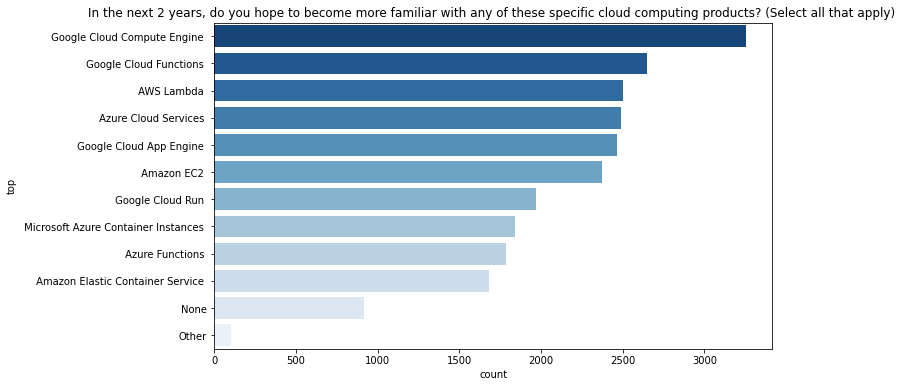

In [109]:
show_plot_by_qno('Q27_B')

EC2 가 많이 내려간 것을 볼 수 있다.

###주로 어떤 머신러닝 **제품**을 사용하고 있는지?

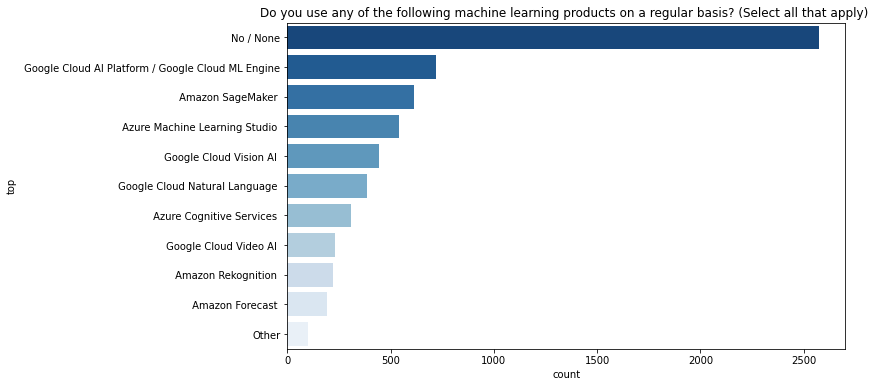

In [110]:
show_plot_by_qno('Q28_A')

###앞으로 2년 동안은 어떤 머신러닝 **제품**을 사용할 것인지? 

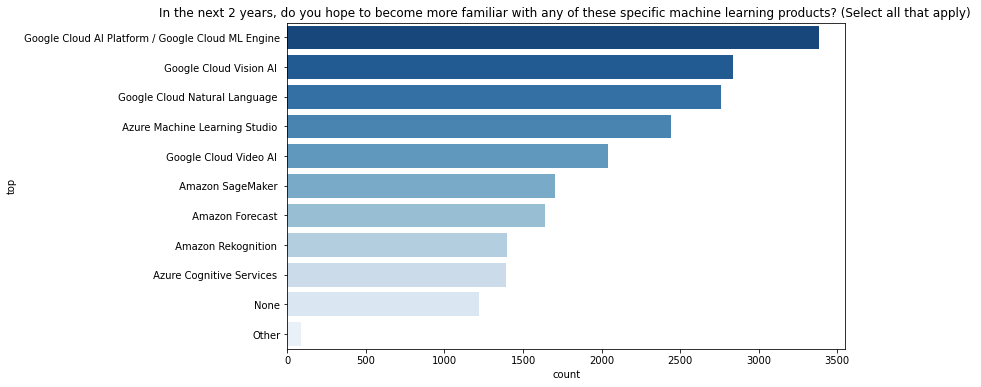

In [111]:
show_plot_by_qno('Q28_B')

###주로 어떤 빅데이터 관련 **제품**을 사용하고 있는지?

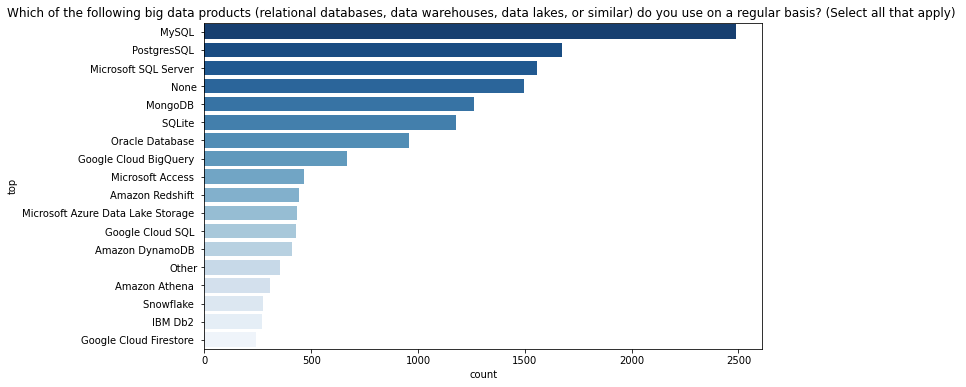

In [112]:
show_plot_by_qno('Q29_A')

###앞으로 2년 동안은 어떤 빅데이터 관련 **제품**을 사용할 것인지? 

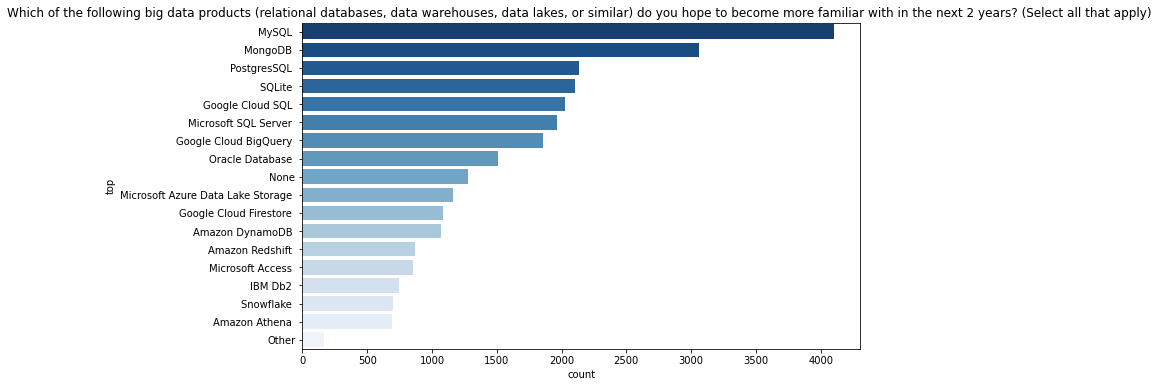

In [113]:
show_plot_by_qno('Q29_B')

MySQL 이 여전히 가장 많고 MongoDB 가 뜨고 있는 듯 하다.

###가장 자주 사용하는 빅데이터 관련 **제품**은 무엇인지?

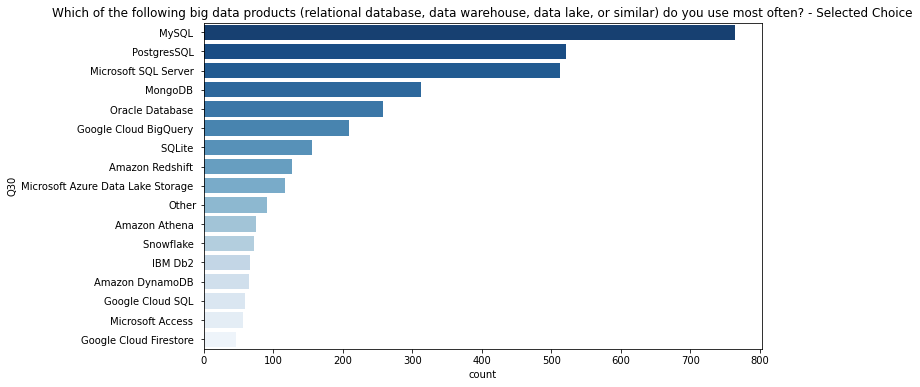

In [114]:
show_plot_by_qno('Q30')

###주로 어떤 비즈니스 인텔리전스 도구를 사용하고 있는지?

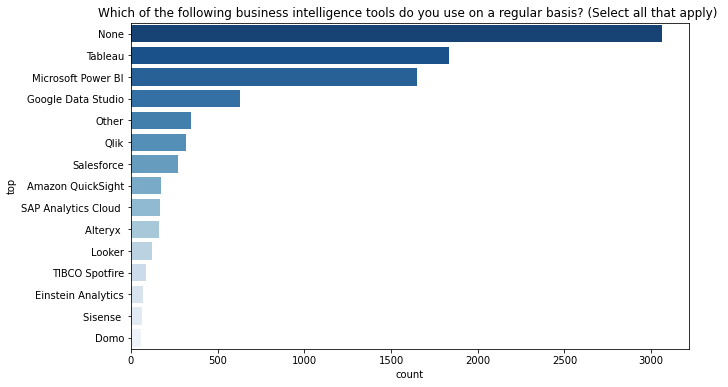

In [115]:
show_plot_by_qno('Q31_A')

###앞으로 2년 동안은 어떤 비즈니스 인텔리전스 도구를 사용할 것인지? 

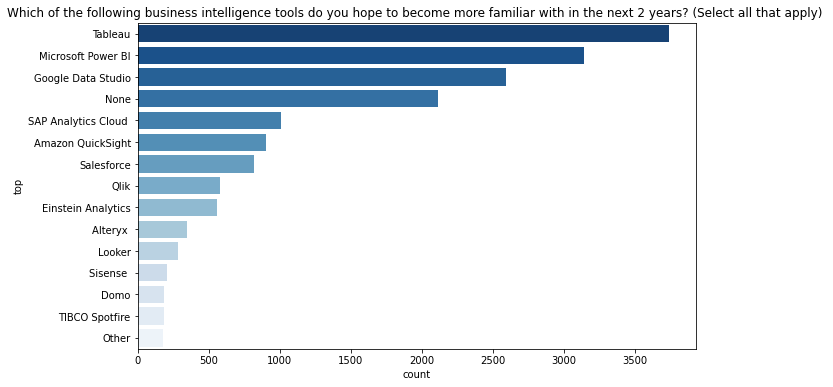

In [116]:
show_plot_by_qno('Q31_B')

###가장 자주 사용하는 비즈니스 인텔리전스 도구는 무엇인지?

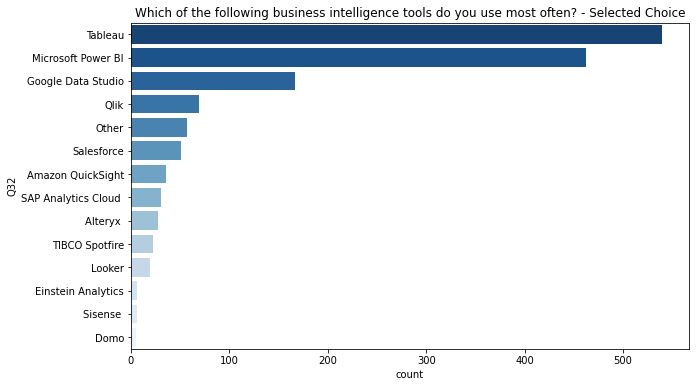

In [117]:
show_plot_by_qno('Q32')

###주로 AutoML 도구를 언제 사용하는지?

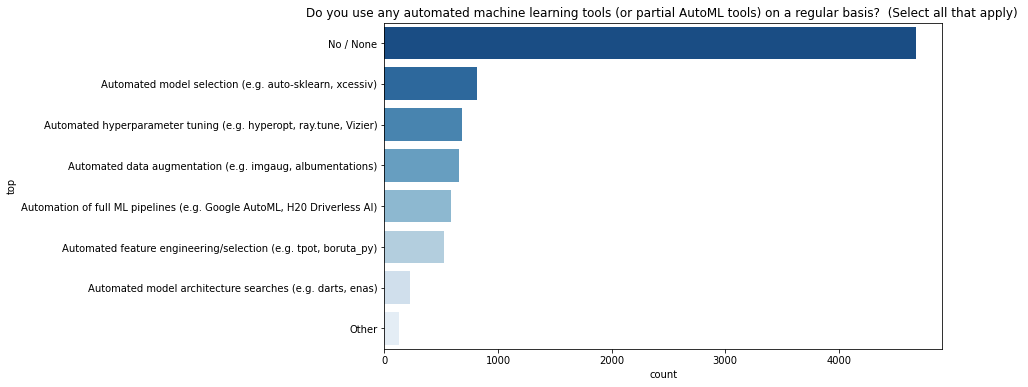

In [119]:
show_plot_by_qno('Q33_A')

여러가지를 도와준다!!!

###앞으로 2년 동안은 언제 AutoML 도구를 사용할 것인지? 

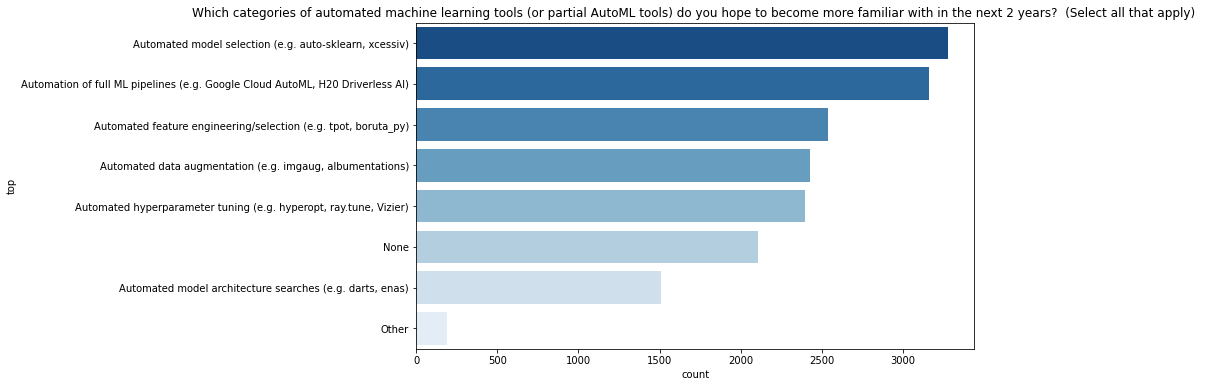

In [120]:
show_plot_by_qno('Q33_B')

###주로 어떤 AutoML 도구를 사용하고 있는지?

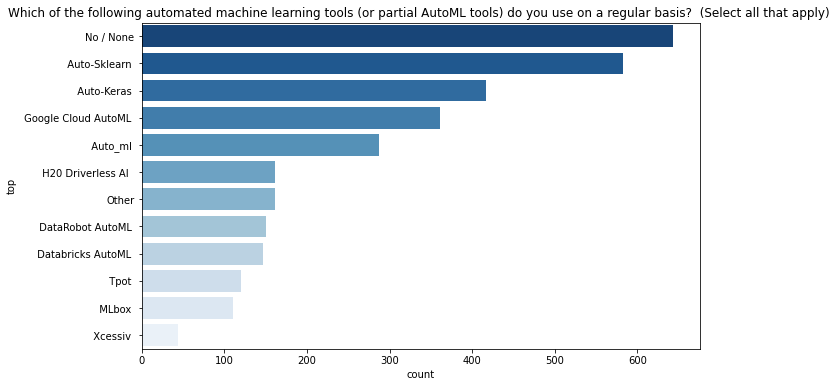

In [121]:
show_plot_by_qno('Q34_A')

###앞으로 2년 동안은 어떤 AutoML 도구를 사용할 것인지? 

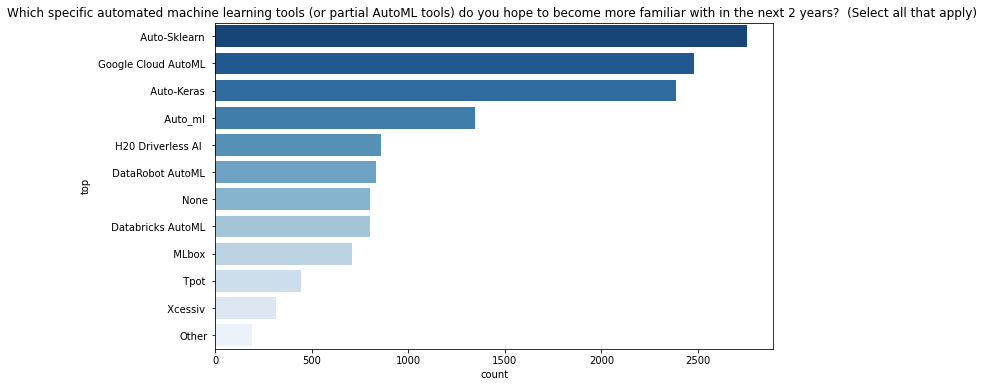

In [122]:
show_plot_by_qno('Q34_B')

###머신러닝을 운영할 때 주로 어떤 도구를 사용하고 있는지?

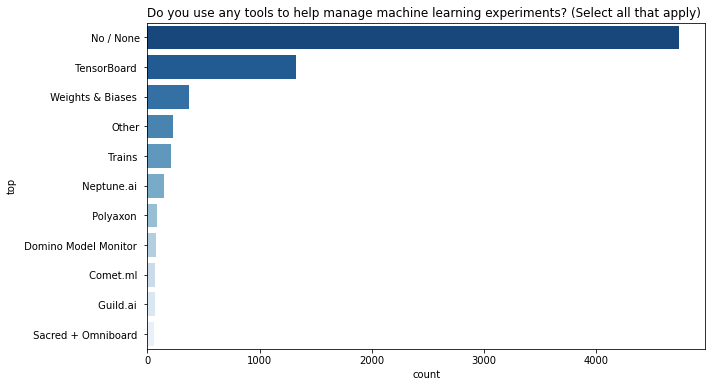

In [123]:
show_plot_by_qno('Q35_A')

###앞으로 2년 동안은 어떤 머신러닝 운영 도구를 사용할 것인지? 

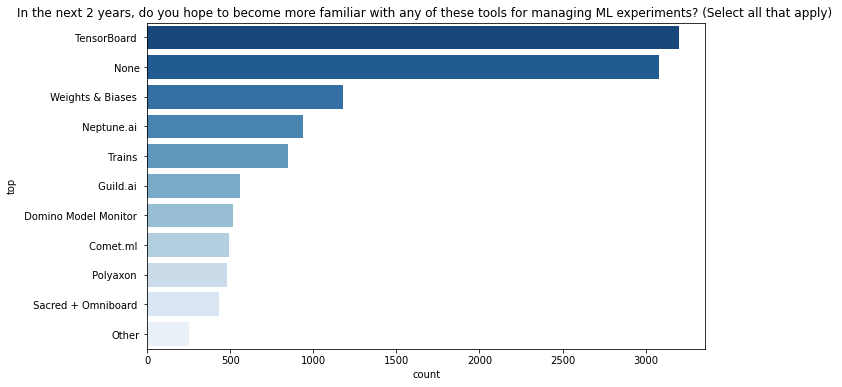

In [124]:
show_plot_by_qno('Q35_B')

##캐글러는 어떤 학습 플랫폼을 사용할까?

###데이터 분석, 머신러닝 작업을 주로 어디에 공유하는지?

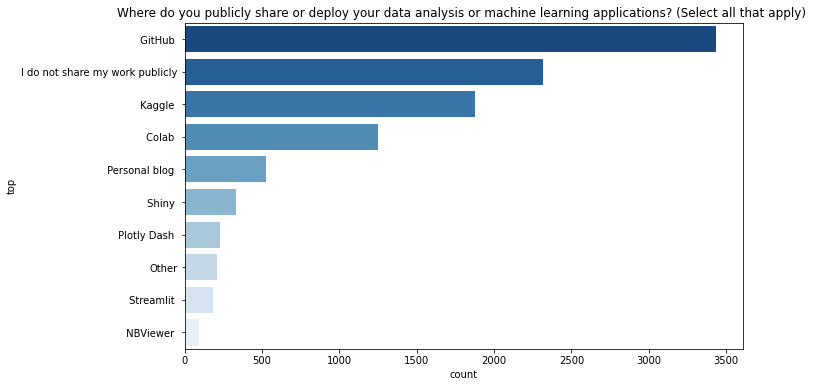

In [125]:
show_plot_by_qno('Q36')

깃헙에 많이 많이 올려봅시다 🍀🍀

###어떤 데이터 사이언스 코스를 듣고 있거나 완료했는지? 🤓

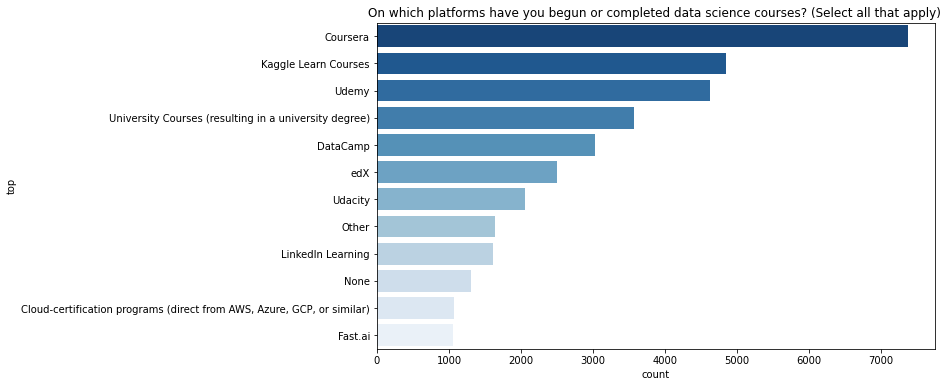

In [126]:
show_plot_by_qno('Q37')

##캐글러는 어떤 데이터 분석 도구를 사용할까?

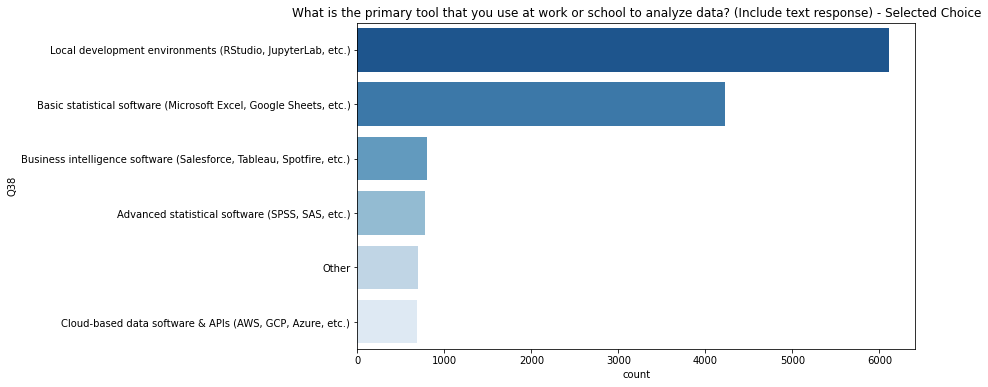

In [145]:
show_plot_by_qno('Q38')

##캐글러가 가장 선호하는 데이터 사이언스 주제 관련 미디어는 무엇일까? (정보를 얻는 곳!)

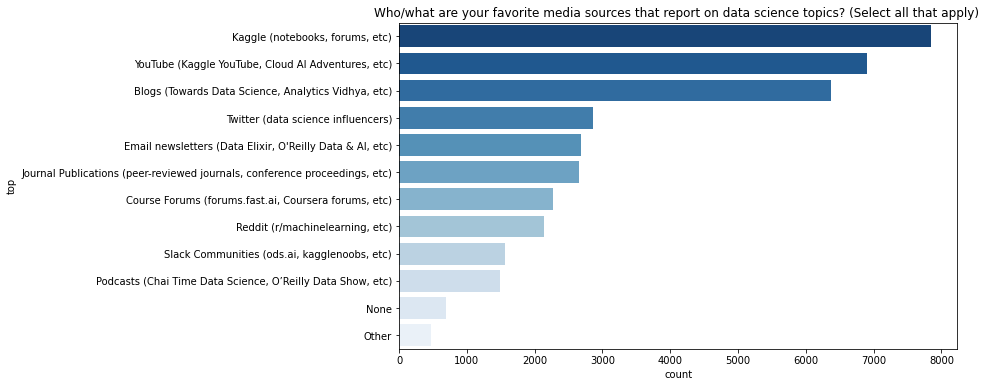

In [146]:
show_plot_by_qno('Q39')

반가운 Towards Data Science